In [11]:
import pandas as pd
import numpy as np
from newsapi import NewsApiClient
from nltk.stem import WordNetLemmatizer
from dotenv import load_dotenv
from path import Path
%matplotlib inline

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
    - Ethereum

2. Which coin had the highest negative score?
    - Ethereum
3. Which coin had the highest positive score?
    - Ethereum

In [13]:
# Read your api key environment variable

load_dotenv()
api_key=os.getenv('NEWS_API_KEY')

In [15]:
# Create a newsapi client
newsapi_client = NewsApiClient(api_key=api_key)
newsapi_client

In [17]:
# Fetch the Bitcoin news articles
BTC_headlines = newsapi_client.get_everything(q="bitcoin", language="en",
                                      from_param='2020-07-01',
                                      to='2020-07-15')
BTC_headlines['articles'][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Zack Whittaker',
 'title': 'Many popular Twitter accounts simultaneously hacked to spread cryptocurrency scam',
 'description': 'A number of high-profile cryptocurrency Twitter accounts were simultaneously hacked on Wednesday by attackers who used the accounts — some with millions of followers — to spread cryptocurrency scams. @bitcoin, @ripple, @coindesk, @coinbase, and @binance were …',
 'url': 'http://techcrunch.com/2020/07/15/twitter-accounts-hacked-crypto-scam/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-887657568.jpg?w=600',
 'publishedAt': '2020-07-15T20:34:54Z',
 'content': 'A number of high-profile Twitter accounts were simultaneously hacked on Wednesday by attackers who used the accounts some with millions of followers to spread a cryptocurrency scam.\r\n@bitcoin, @rippl… [+2161 chars]'}

In [19]:
# Fetch the Ethereum news articles
ETH_headlines = newsapi_client.get_everything(q="ethereum", language="en",
                                      from_param='2020-07-01',
                                      to='2020-07-15')
ETH_headlines['articles'][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Frederic Lardinois',
 'title': 'Vendia raises $5.1M for its multi-cloud serverless platform',
 'description': 'When the inventor of AWS Lambda, Tim Wagner, and the former head of blockchain at AWS, Shruthi Rao, co-found a startup, it’s probably worth paying attention. Vendia, as the new venture is called, combines the best of serverless and blockchain to help build a …',
 'url': 'http://techcrunch.com/2020/07/01/vendia-raises-5-1m-for-its-multi-cloud-serverless-platform/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-1197243194.jpg?w=571',
 'publishedAt': '2020-07-01T15:00:17Z',
 'content': 'When the inventor of AWS Lambda, Tim Wagner, and the former head of blockchain at AWS, Shruthi Rao, co-found a startup, it’s probably worth paying attention. Vendia, as the new venture is called, com… [+4751 chars]'}

In [20]:
# Create the Bitcoin sentiment scores DataFrame
BTC_df=pd.DataFrame(BTC_headlines['articles'])

In [26]:
BTC_df.head(2)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Zack Whittaker,Many popular Twitter accounts simultaneously h...,A number of high-profile cryptocurrency Twitte...,http://techcrunch.com/2020/07/15/twitter-accou...,https://techcrunch.com/wp-content/uploads/2020...,2020-07-15T20:34:54Z,A number of high-profile Twitter accounts were...
1,"{'id': 'cnn', 'name': 'CNN'}","Rishi Iyengar, CNN Business","Elon Musk, Bill Gates, Apple, Uber, and others...","Twitter accounts belonging to Joe Biden, Bill ...",https://www.cnn.com/2020/07/15/tech/twitter-ha...,https://cdn.cnn.com/cnnnext/dam/assets/2002180...,2020-07-15T21:16:32Z,San Francisco (CNN Business)Twitter(TWTR) acco...


In [21]:
# Create the ethereum sentiment scores DataFrame
ETH_df=pd.DataFrame(ETH_headlines['articles'])

In [28]:
ETH_df.head(2)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Frederic Lardinois,Vendia raises $5.1M for its multi-cloud server...,"When the inventor of AWS Lambda, Tim Wagner, a...",http://techcrunch.com/2020/07/01/vendia-raises...,https://techcrunch.com/wp-content/uploads/2020...,2020-07-01T15:00:17Z,"When the inventor of AWS Lambda, Tim Wagner, a..."
1,"{'id': None, 'name': 'Techmeme.com'}",None,Report: Active users on Ethereum-based dapps d...,Alexander Behrens / Decrypt:\nReport: Active u...,https://www.techmeme.com/200706/p29,https://cdn.decrypt.co/resize/1024/height/512/...,2020-07-07T00:35:01Z,None


In [42]:
# Describe the Bitcoin Sentiment
btc_scores=[analyzer.polarity_scores(x) if not x==None else {'neg': np.nan, 'neu':np.nan, 'pos':np.nan, 'compound':np.nan} for x in BTC_df['content']]

btc_sentiment=pd.DataFrame(btc_scores, index=range(0, len(btc_scores)))
btc_sentiment=btc_sentiment.join(BTC_df['content'])
#btc_sentiment.head()
btc_sentiment.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.060050,0.889000,0.050950,0.005010
std,0.087864,0.076024,0.041523,0.514151
min,0.000000,0.687000,0.000000,-0.868900
25%,0.000000,0.876000,0.000000,-0.406800
50%,0.000000,0.910000,0.071500,0.051350
75%,0.103750,0.919500,0.090000,0.507000
max,0.277000,1.000000,0.090000,0.507000


In [43]:
# Describe the Ethereum Sentiment
eth_scores=[analyzer.polarity_scores(x) if not x==None else {'neg': np.nan, 'neu':np.nan, 'pos':np.nan, 'compound':np.nan} for x in ETH_df['content']]

eth_sentiment=pd.DataFrame(eth_scores, index=range(0, len(btc_scores)))
eth_sentiment=eth_sentiment.join(ETH_df['content'])
#btc_sentiment.head()
eth_sentiment.describe()

,neg,neu,pos,compound
count,18.000000,18.000000,18.000000,18.000000
mean,0.038333,0.891944,0.069778,0.155850
std,0.048786,0.090392,0.071041,0.353530
min,0.000000,0.660000,0.000000,-0.440400
25%,0.000000,0.853250,0.000000,-0.094500
50%,0.000000,0.914500,0.062500,0.226300
75%,0.076750,0.945250,0.108000,0.391725
max,0.137000,1.000000,0.219000,0.726900


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [44]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [46]:
# Expand the default stopwords list if necessary
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JATIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\JATIN\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JATIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JATIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [49]:
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    tokens=word_tokenize(text)
    # Create a list of the words
    words=[word.lower() for word in tokens]
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [50]:
# Create a new tokens column for bitcoin
btc_sentiment.dropna(inplace=True)
btc_sentiment['tokens']=btc_sentiment['content'].apply(tokenizer)
btc_sentiment.head(3)

,neg,neu,pos,compound,content,tokens
0,0.277,0.687,0.036,-0.8689,A number of high-profile Twitter accounts were...,"[number, high-profile, twitter, account, simul..."
1,0.000,0.927,0.073,0.3182,San Francisco (CNN Business)Twitter(TWTR) acco...,"[san, francisco, cnn, business, twitter, twtr,..."
2,0.101,0.815,0.084,-0.1531,Something normal happened on Twitter earlier t...,"[something, normal, happened, twitter, earlier..."


In [51]:
# Create a new tokens column for ethereum
eth_sentiment.dropna(inplace=True)
eth_sentiment['tokens']=eth_sentiment['content'].apply(tokenizer)
eth_sentiment.head(3)

,neg,neu,pos,compound,content,tokens
0,0.000,0.947,0.053,0.2263,"When the inventor of AWS Lambda, Tim Wagner, a...","[inventor, aws, lambda, tim, wagner, former, h..."
3,0.051,0.847,0.102,0.3612,Interest in bitcoin and other cryptocurrencies...,"[interest, bitcoin, cryptocurrencies, includin..."
4,0.088,0.912,0.000,-0.3400,"Lightweight, open-source, universal paper wall...","[lightweight, open-source, universal, paper, w..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [52]:
from collections import Counter
from nltk import ngrams

In [53]:
# Generate the Bitcoin N-grams where N=2
(Counter(ngrams([word for token_list in btc_sentiment['tokens'] for word in token_list], 2))).most_common()

[(('satoshi', 'nakaboto'), 16),
 (('char', 'robot'), 8),
 (('robot', 'colleague'), 8),
 (('colleague', 'satoshi'), 8),
 (('nakaboto', 'writes'), 8),
 (('writes', 'bitcoin'), 8),
 (('every', 'fucking'), 8),
 (('fucking', 'day'), 8),
 (('day', 'welcome'), 8),
 (('welcome', 'another'), 8),
 (('another', 'edition'), 8),
 (('edition', 'bitcoin'), 8),
 (('bitcoin', 'today'), 8),
 (('today', 'satoshi'), 8),
 (('nakaboto', 'tell'), 8),
 (('tell', 'whats'), 8),
 (('whats', 'going'), 8),
 (('going', 'bitcoin'), 8),
 (('twitter', 'account'), 7),
 (('bitcoin', 'btc'), 7),
 (('btc', 'every'), 7),
 (('elon', 'musk'), 6),
 (('joe', 'biden'), 4),
 (('bill', 'gate'), 4),
 (('gate', 'elon'), 3),
 (('high', 'profile'), 3),
 (('high-profile', 'twitter'), 2),
 (('hacked', 'wednesday'), 2),
 (('cryptocurrency', 'scam'), 2),
 (('account', 'belonging'), 2),
 (('biden', 'bill'), 2),
 (('musk', 'apple'), 2),
 (('send', 'bitcoin'), 2),
 (('barack', 'obama'), 2),
 (('billionaire', 'bill'), 2),
 (('account', 'hack

In [54]:
# Generate the Ethereum N-grams where N=2
(Counter(ngrams([word for token_list in eth_sentiment['tokens'] for word in token_list], 2))).most_common()

[(('paper', 'wallet'), 2),
 (('bitcoin', 'ethereum'), 2),
 (('weird', 'year'), 2),
 (('char', 'disclosurethe'), 2),
 (('disclosurethe', 'leader'), 2),
 (('leader', 'blockchain'), 2),
 (('blockchain', 'news'), 2),
 (('news', 'coindesk'), 2),
 (('coindesk', 'medium'), 2),
 (('medium', 'outlet'), 2),
 (('outlet', 'strives'), 2),
 (('strives', 'highest'), 2),
 (('highest', 'journalistic'), 2),
 (('journalistic', 'standard'), 2),
 (('standard', 'abides'), 2),
 (('abides', 'strict'), 2),
 (('strict', 'set'), 2),
 (('set', 'editorial'), 2),
 (('editorial', 'policy'), 2),
 (('policy', 'coindesk'), 2),
 (('coindesk', 'independent'), 2),
 (('independent', 'op…'), 2),
 (('op…', '+103'), 2),
 (('+103', 'char'), 2),
 (('char', 'ethereum'), 2),
 (('inventor', 'aws'), 1),
 (('aws', 'lambda'), 1),
 (('lambda', 'tim'), 1),
 (('tim', 'wagner'), 1),
 (('wagner', 'former'), 1),
 (('former', 'head'), 1),
 (('head', 'blockchain'), 1),
 (('blockchain', 'aws'), 1),
 (('aws', 'shruthi'), 1),
 (('shruthi', 'rao

In [55]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [56]:
# Get the top 10 words for Bitcoin
token_count([word for token_list in btc_sentiment['tokens'] for word in token_list])

[('bitcoin', 30),
 ('char', 20),
 ('satoshi', 16),
 ('nakaboto', 16),
 ('account', 12),
 ('twitter', 10),
 ('robot', 8),
 ('colleague', 8),
 ('writes', 8),
 ('every', 8)]

In [58]:
# Get the top 10 words for Ethereum
token_count([word for token_list in eth_sentiment['tokens'] for word in token_list])

[('char', 18),
 ('ethereum', 13),
 ('bitcoin', 7),
 ('coindesk', 6),
 ('blockchain', 5),
 ('new', 5),
 ('crypto', 5),
 ('’', 4),
 ('wallet', 4),
 ('network', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

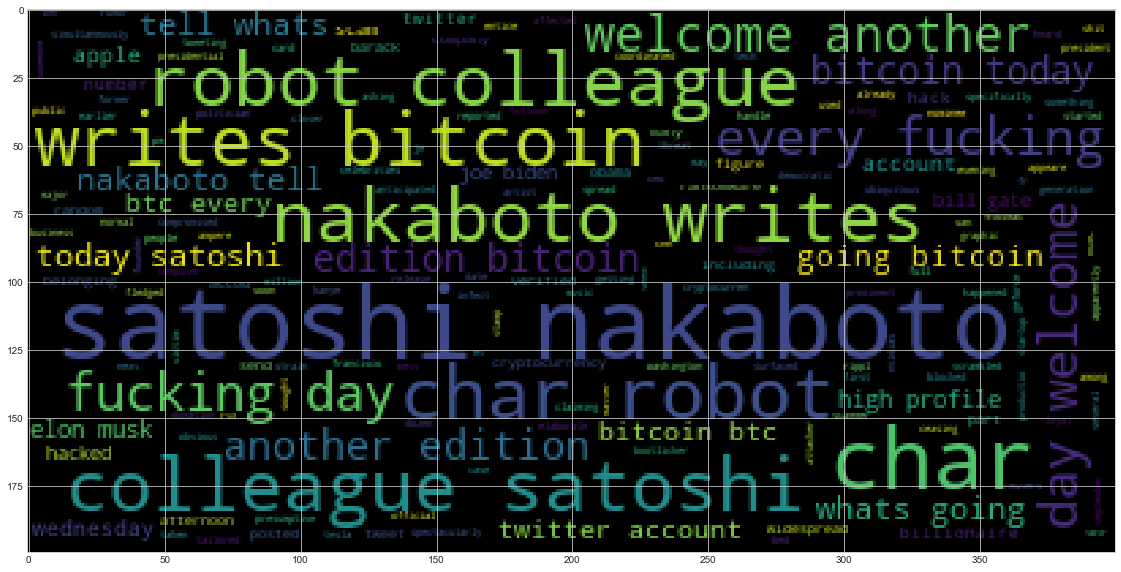

In [60]:
# Generate the Bitcoin word cloud
btctokens=[word for token_list in btc_sentiment['tokens'] for word in token_list]
btctokens=' '.join(btctokens)
wc=WordCloud().generate(btctokens)
plt.imshow(wc)

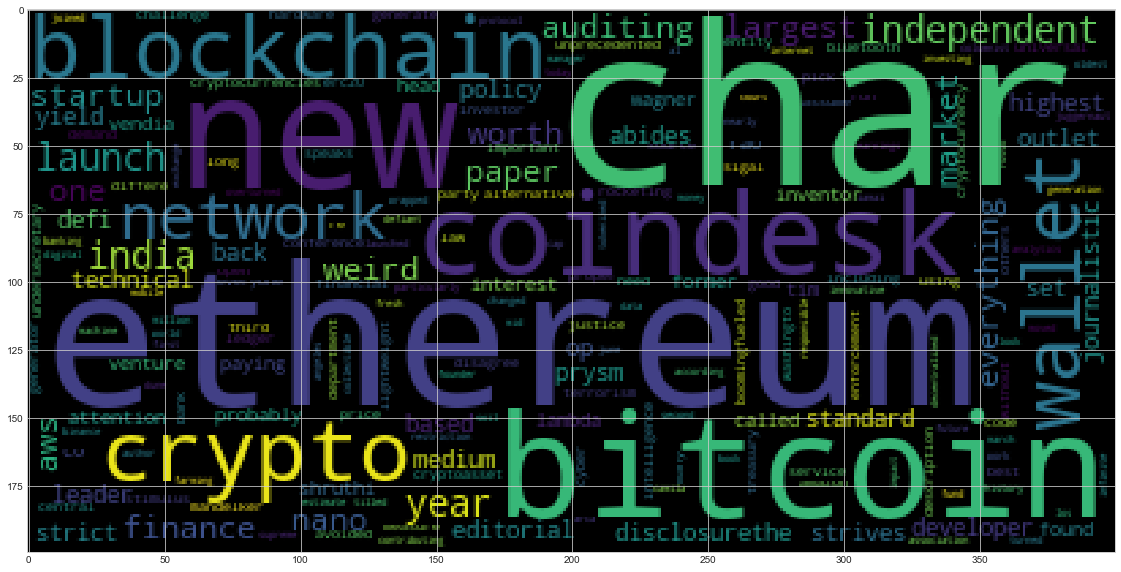

In [61]:
# Generate the Ethereum word cloud
ethtokens=[word for token_list in eth_sentiment['tokens'] for word in token_list]
ethtokens=' '.join(ethtokens)
wc=WordCloud().generate(ethtokens)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [64]:
import spacy
from spacy import displacy

In [65]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [66]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [68]:
# Concatenate all of the bitcoin text together
btc_str=' '.join([x for x in btc_sentiment['content']])
btc_str

"A number of high-profile Twitter accounts were simultaneously hacked on Wednesday by attackers who used the accounts some with millions of followers to spread a cryptocurrency scam.\r\n@bitcoin, @rippl… [+2161 chars] San Francisco (CNN Business)Twitter(TWTR) accounts belonging to Joe Biden, Bill Gates, Elon Musk and Apple, among other prominent handles, were compromised on Wednesday and posted tweets that appeare… [+440 chars] Something normal happened on Twitter earlier this afternoon. Someone claiming to be Elon Musk started tweeting an obvious scam to entice his loyal bootlickers to send bitcoin to a random cryptocurren… [+1211 chars] Twitter spectacularly shit the bed on Wednesday evening as it scrambled to stamp out a widespread hack of high-profile accounts.\r\nSoon after 6 pm ET, several verified Twitter accounts were blocked fr… [+1465 chars] The threat of ransomware may seem ubiquitous, but there haven't been too many strains tailored specifically to infect Apple's Mac comput

In [75]:
# Run the NER processor on all of the text
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
btc_after_nlp=nlp(btc_str)
btc_after_nlp.user_data['title']='Bitcoin NER'
displacy.render(btc_after_nlp, style='ent',\
options = {"ents": None, "colors": colors})



In [71]:
# Render the visualization

In [70]:
# List all Entities
print(list(map(lambda x: print(f'{x}  {x.label_}'), btc_after_nlp.ents)))

Twitter  ORG
Wednesday  DATE
millions  CARDINAL
@rippl  ORG
San Francisco  GPE
CNN  ORG
Joe Biden  PERSON
Bill Gates  PERSON
Elon Musk  ORG
Apple  ORG
Wednesday  DATE
Twitter  ORG
earlier this afternoon  TIME
Elon Musk  ORG
Twitter  ORG
Wednesday evening  TIME
6 pm ET  TIME
Twitter  ORG
Apple  ORG
Mac  ORG
first  ORDINAL
Mac  ORG
Barack Obama  PERSON
Joe Biden  PERSON
Elon Musk  PERSON
Kanye West  GPE
Apple  ORG
WASHINGTON  GPE
Reuters  ORG
Twitter  ORG
Bill Gates  PERSON
Elon Musk  ORG
bitcoin  GPE
Wednesday  DATE
Nvidias  GPE
September 2020  DATE
GeForce RTX 30  LAW
Ampere  NORP
Satoshi Nakaboto  ORG
Bitcoin  GPE
Bitcoin  GPE
Today  DATE
Satoshi Nakaboto  PERSON
Bitcoin  GPE
Satoshi Nakaboto  ORG
Bitcoin  GPE
Bitcoin  GPE
Today  DATE
Satoshi Nakaboto  PERSON
Bitcoin  GPE
Satoshi Nakaboto  ORG
Bitcoin  GPE
Bitcoin  GPE
Today  DATE
Satoshi Nakaboto  PERSON
Bitcoin  GPE
Satoshi Nakaboto  ORG
Bitcoin  GPE
Bitcoin  GPE
Today  DATE
Satoshi Nakaboto  PERSON
Bitcoin  GPE
Satoshi Nakaboto  OR

---

## Ethereum NER

In [72]:
# Concatenate all of the bitcoin text together
eth_str=' '.join([x for x in eth_sentiment['content']])
eth_str

"When the inventor of AWS Lambda, Tim Wagner, and the former head of blockchain at AWS, Shruthi Rao, co-found a startup, it’s probably worth paying attention. Vendia, as the new venture is called, com… [+4751 chars] Interest in bitcoin and other cryptocurrencies, including ethereum, is boomingfueled by unprecedented central bank stimulus measures and rocketing demand for alternative finance.\r\nThe bitcoin price, … [+3141 chars] Lightweight, open-source, universal paper wallet generator\r\nDescription\r\nUsing third-party services to generate paper wallets should be avoided without proper code auditing by independent entities.\r\n… [+2361 chars] Many who are new to crypto assume that there will only be one important cryptoasset in the long run, and that the challenge as an investor is to pick the best one.\r\nWe disagree.\r\nWhy? Because differe… [+9664 chars] If you're into cryptocurrency like Bitcoin, Ethereum, ERC20, and others, then you need a good crypto wallet. The Ledger Nano X 

In [74]:
# Run the NER processor on all of the text
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
eth_after_nlp=nlp(eth_str)
eth_after_nlp.user_data['title']='Ethereumn NER'
displacy.render(eth_after_nlp, style='ent',\
options = {"ents": None, "colors": colors})



In [76]:
# Render the visualization

In [77]:
# List all Entities
print(list(map(lambda x: print(f'{x}  {x.label_}'), eth_after_nlp.ents)))

AWS Lambda  ORG
Tim Wagner  PERSON
Shruthi Rao  PERSON
Vendia  ORG
third  ORDINAL
one  CARDINAL
Bitcoin  GPE
Ethereum  GPE
ERC20  ORG
The Ledger Nano X Bluetooth  WORK_OF_ART
89.25  MONEY
Amazon  ORG
Sigal Mandelker  PERSON
U.S. Treasury  ORG
2018  DATE
the Department of Justice  ORG
a weird year  DATE
year  DATE
second  ORDINAL
Nearly $60 million  MONEY
June  DATE
Dune Analytics  ORG
Bitcoin  GPE
Indias Supreme Court  ORG
March  DATE
Binance  ORG
the Internet and Mobile Association of India  ORG
DisclosureThe  ORG
CoinDesk  PRODUCT
Los Angeles  GPE
Generation Z’s  ORG
DeFi  FAC
DeFi  ORG
Camila Russo  PERSON
The Infinite Machine  WORK_OF_ART
first  ORDINAL
today  DATE
Almost five years ago  DATE
July  DATE
Richard Ma  PERSON
Quantstamp  GPE
CoinDesk  PERSON
Marlin  PRODUCT
OpenWeaver  PRODUCT
San Francisco  GPE
U.S.  GPE
Bangalore  GPE
India  GPE
BTC  ORG
CoinDesk’s Markets Daily  ORG
Bitcoin  GPE
Eth 2.0  PERSON
2020  DATE
DisclosureThe  ORG
CoinDesk  PRODUCT
[None, None, None, None,